## **Support Vector Classifier (SVC)**

#### 1. Introduction to SVC and Kernel Functions

**SVC Basics:**

- SVC Goal: Support Vector Classifier aims to find the best decision boundary (hyperplane) that separates data points of different classes with the largest possible margin.
- Kernel Functions: Kernels allow SVC to transform data into higher-dimensional spaces, making it easier to separate classes that aren’t linearly separable in the original feature space.


**Common Kernels in SVC:**

1. Linear Kernel: Works well for linearly separable data. It doesn’t perform any transformation.
2. Polynomial Kernel: Maps data into a higher polynomial space to separate classes.
3. Radial Basis Function (RBF) Kernel: Creates circular decision boundaries, good for complex, nonlinear datasets.

#### 2. SVC Different Kernels

**1. Linear Kernel**

- Explanation: The linear kernel is the simplest type of kernel and works best for data that can be separated by a straight line (or a flat plane in higher dimensions).
- Analogy: Imagine you’re trying to separate red and blue marbles on a flat table. If the red marbles are mostly on one side and the blue marbles on the other, you could simply place a ruler (a straight line) between them to divide the two groups. This is how the linear kernel works—it finds a straight line (or plane) that best separates the two groups of data.
- Best Use Case: When data is linearly separable—meaning a straight line can divide the classes without too many errors—the linear kernel is efficient and often performs very well.

**2. Polynomial Kernel**

- Explanation: The polynomial kernel can handle more complex relationships in the data by looking at combinations of features (the data’s characteristics). By adding a degree parameter (like a power of 2 or 3), it captures patterns that a simple straight line cannot.
- Analogy: Let’s go back to our marbles example, but now imagine that some marbles are scattered in a way that no straight line can cleanly separate them. In this case, we can use a curved or wavy divider that bends around the clusters of red and blue marbles. The polynomial kernel adds this flexibility by allowing the line to bend, making it possible to separate data that follows more complex shapes.
- Best Use Case: When there are non-linear relationships in the data but not extremely complex ones. For example, if the data roughly forms circular clusters, a polynomial kernel with degree 2 or 3 might fit well.

**3. Radial Basis Function (RBF) Kernel**

- Explanation: The RBF kernel (often referred to as the Gaussian kernel) is like the “go-to” kernel when the data is very complex and not linearly separable. It works by creating circular decision boundaries around each data point and is able to adapt to highly non-linear patterns.
- Analogy: Imagine the marbles are scattered in many small, tight clusters. With the RBF kernel, instead of a straight or wavy line, you get small, circular zones around each cluster that help identify and classify them. It’s as if you’re placing circular borders around each group of marbles to distinguish them from others.
- Best Use Case: When data has highly complex, non-linear patterns that can’t be easily separated by straight or simple curved lines. RBF is popular because it can handle many shapes of data distributions, but it requires tuning parameters for the best performance.

#### 3. Code Example

In [3]:
# Importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [4]:
# Generate a nonlinear dataset with 'moons' pattern for variety
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

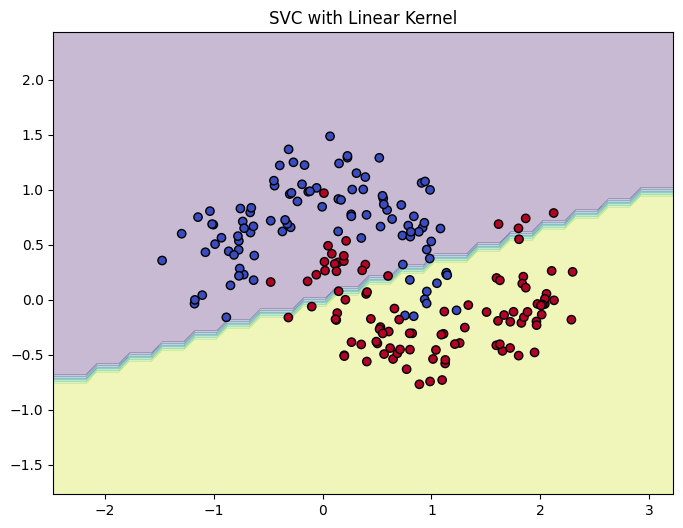

Linear Kernel Accuracy: 0.8333333333333334


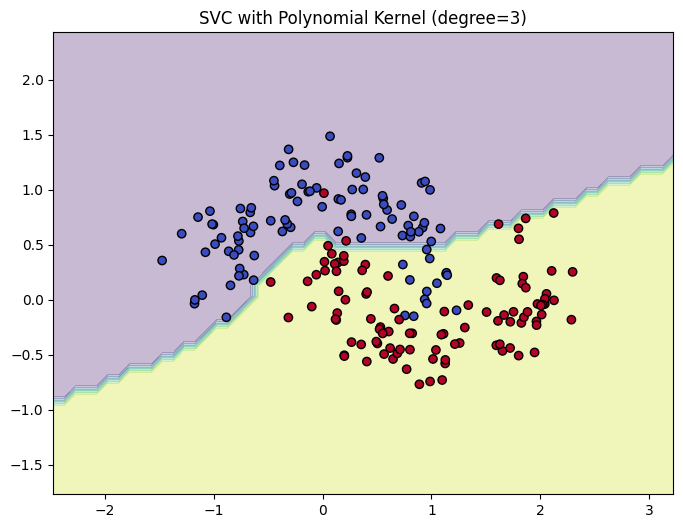

Polynomial Kernel Accuracy: 0.95


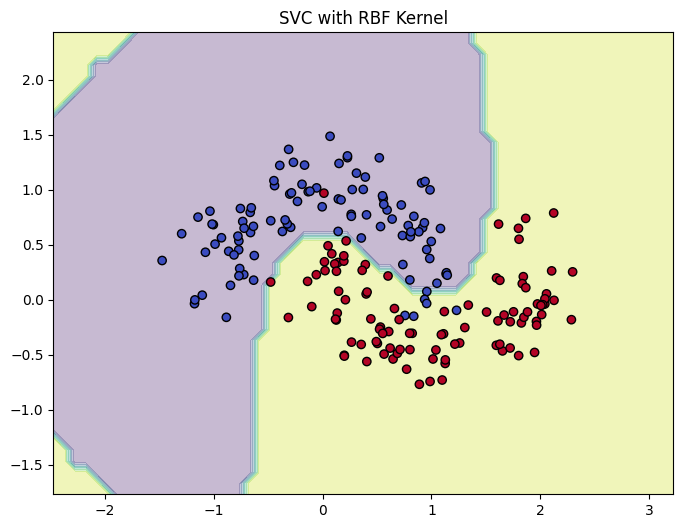

RBF Kernel Accuracy: 0.9666666666666667


In [5]:
# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    
    # Create a grid to plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict class for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.show()

# Linear Kernel
linear_clf = SVC(kernel='linear')
linear_clf.fit(X_train, y_train)
plot_decision_boundary(linear_clf, X, y, "SVC with Linear Kernel")
print("Linear Kernel Accuracy:", accuracy_score(y_test, linear_clf.predict(X_test)))

# Polynomial Kernel
poly_clf = SVC(kernel='poly', degree=3)
poly_clf.fit(X_train, y_train)
plot_decision_boundary(poly_clf, X, y, "SVC with Polynomial Kernel (degree=3)")
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, poly_clf.predict(X_test)))

# RBF Kernel
rbf_clf = SVC(kernel='rbf')
rbf_clf.fit(X_train, y_train)
plot_decision_boundary(rbf_clf, X, y, "SVC with RBF Kernel")
print("RBF Kernel Accuracy:", accuracy_score(y_test, rbf_clf.predict(X_test)))
